<h2 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Métodos Numericos, Taller 4</span></h2>

<h1 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Interpolación y Regresiones lineales</span></h1>

<p style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Universidad del Valle, Departamento de f&iacute;sica, Cali, Colombia</span></p>

<h3 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Miguel &Aacute;ngel Jaramillo Quengu&aacute;n</span></h3>

<p style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Codigo: 2070763</span></p>

<p style="text-align:center"><span style="font-family:Courier New,Courier,monospace"><a href="mailto:miguel.quenguan@correounivalle.edu.co">miguel.quenguan@correounivalle.edu.co</a></span></p>

<p style="text-align:center">Presentado a Miguel Angel Vargas</p>

In [1]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Rregresión Lineal

**a.** Construya la matriz A y el vector c, de modo que pueda encontrar la pendiente m y el corte con el eje b de la linea recta se ajusta a los datos,
mediante la solución del sistema:
$$\textbf{A} \left(\begin{matrix} m \\ b \end{matrix}\right)=\textbf{c}$$ 

como se vio en clase.

**b.** Dado que el el sistema anterior no tiene solución, solucione el problema de minimización

$$ \min{|| \textbf{Az}-\textbf{c} ||^{2}} $$

para encontrar $\textbf{z} = (m, b)$ de la pendiente y corte con el eje de la linea recta que mejor se ajusta a los datos (Realice el cálculo con la expresión que se concluyó en clase, mediante el uso de herramientas de numpy para el cálculo de matriz transpuesta e inversa).

**c.** Calcule el error cuadrático de la Regresión Lineal obtenida.

**d.** Utilice la regresión lineal para estimar el valor de y en x = 7.


Dados los datos de la tabla. se encuentra el sistema:

$$\begin{pmatrix}  
1 & 1\\
2 & 1\\
3 & 1\\
4 & 1\\
5 & 1 \\
6 & 1 \\
8 & 1 \\
9 & 1 \\
10 &1
\end{pmatrix} \begin{pmatrix}  
m\\
b
\end{pmatrix}  =\begin{pmatrix} 6.5  \\
12.8 \\
32.6 \\
70.5 \\
130.2 \\
212.6 \\
489.5 \\
764.6 \\
998.7 \end{pmatrix}$$

El sistema a solucionar esta dado por:

$$ \mathbf{A^{T}Az=A^{T}C } $$

In [2]:
#solucionando el sistema

def opt(A,y):#A, matriz de coeficientes de coeficientes con unos en la n-esima columna; y lista de valores en Y
    sol=np.linalg.solve(A.transpose()@A,A.transpose()@y)
    return sol


In [3]:
#generando parametros e introduciendo datos
A=np.array([[1,1],[2,1],[3,1],[4,1],[5,1],[6,1],[8,1],[9,1],[10,1]])
y=np.array([6.5,12.8,32.6,70.5,130.2,212.6,489.5,764.6,998.7])
sol=opt(A,y)
p,i=opt(A,y)
print(f'La pendiente del sistema problema es: {p} \n El punto de corte del sistema problema es: {i} ')


La pendiente del sistema problema es: 107.83625 
 El punto de corte del sistema problema es: -273.12666666666667 


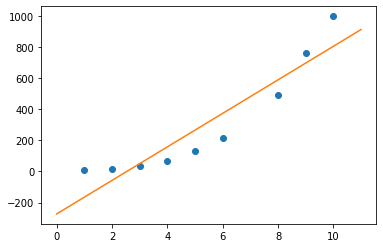

In [4]:
#grafica de ajuste y de puntos
def lin(x,m,b):
    return m*x+b

Ap=[]
for m in range(len(A)):
    Ap.append(A[m][0])
plt.plot(Ap,y,'o')
ax=np.linspace(0,11,40)
yli=lin(ax,p,i)
plt.plot(ax,lin(ax,p,i),label='Regresión lineal')
plt.show()

In [5]:
#calculando el error
M=A@sol-y
err=M.transpose()@M

#calculando en x=7 en la regresion
x7=lin(7,p,i)
print(f'El valor de x=7 es:{x7}')

print(f'El error es de {err} ')

El valor de x=7 es:481.7270833333333
El error es de 138886.45487500002 


# Regresión polinómica

Para la regresión polinómica se tiene un sistema de n+1 columnas (que son los coeficientes de cada regresión) por tantos puntos se tenga en este caso son 9

por tanto se tiene un sistema de $4\times 9$
el cual es:
$$

\begin{pmatrix}

  1.  &  1.  &  1.  &  1.\\
   8. &   4. &   2. &   1\\
  27. &   9. &   3. &   1\\
  64. &  16. &   4. &   1\\
 125. &  25. &   5. &   1\\
 216. &  36. &   6. &   1\\
 512. &  64. &   8. &   1\\
 729. &  81. &   9. &   1\\
1000. & 100. &  10. &   1

\end{pmatrix}
\begin{pmatrix}  
a\\
b\\
c\\
d
\end{pmatrix}
=
\begin{pmatrix} 6.5  \\
12.8 \\
32.6 \\
70.5 \\
130.2 \\
212.6 \\
489.5 \\
764.6 \\
998.7 \end{pmatrix}

$$

Donde las componentes de la matriz A son las potencias de los puntos en x

Para el calculo de la regresión polinómica se minimizan las distancias del polinomio desde los puntos dados, de forma tal que el sistema a solucionar es exactamente igual a una regresión lineal. $$ \mathbf{A^{T}Az=A^{T}C } $$

In [6]:
#~generador de matriz polinomial de orden n
def Apolinom(c,n):#c es la lista de datos a ajustar; n es el orden del polinomio
    N=n+1
    dot=len(c)#numero de puntos o datos a ajustar
    Apol=np.ones((dot,n+1),dtype=float)
    for w in range(dot):
        n=N
        for v in range(N-1):
            Apol[w][v]=c[w]**(n-1)
            n=n-1
    return Apol

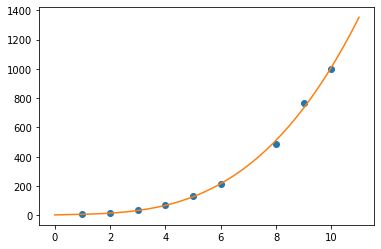

In [7]:
A3=Apolinom(Ap,3)
sol3=opt(A3,y)
a,b,c,d=sol3
def pol3(a,b,c,d,x):
    return a*x**3+b*x**2+c*x+d

plt.plot(Ap,y,'o')
plt.plot(ax,pol3(a,b,c,d,ax),label='Regresión polinómica')

In [8]:
#calculando el error
M=A3@sol3-y
err=M.transpose()@M
print(f'el error en el ajuste polinomico es de: {err}')
#calculando en x=7
print(f'en x=7 {pol3(a,b,c,d,7)}')

el error en el ajuste polinomico es de: 1701.5478012708754
en x=7 341.87377987209356


b. se calcdula en este caso las transpuestas y etc


# Polinomio de Lagrange

para interpolar los puntos y encontrar una expresion $f(x)$ se tiene:

$$f_n(x)=\displaystyle\sum_{i=0}^{n}L_i(x)f(x_i)$$

donde:

$$ L_i(x)=\displaystyle\prod_{j=0;j\neq i}^{n} \frac{x-x_j}{x_i-x_j} $$

In [9]:
#definimos los polinomios y la interpolacion

def L( x , x_datos ,  i):
    Li = 1

    for k in range( len( x_datos ) ): 
        if k != i:
            Li  = Li * (x- x_datos[k]) / ( x_datos[i]- x_datos[k] )      
    return Li 

def P(x): 
    
    Suma = 0 
    for i in range( len(x_datos) ):

        Suma = Suma + f_datos[i] * L( x , x_datos ,  i)
   
    return Suma 

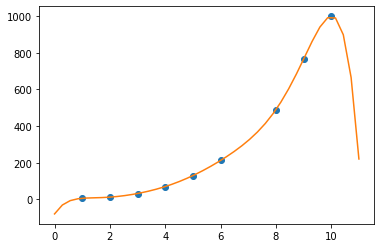

In [10]:
x_datos=Ap
f_datos=y
plt.plot(Ap,y,'o')
plt.plot(ax,P(ax),label='Interpolacion de lagrange')
plt.show()

In [11]:
#evaluando en x=7
P(7)

321.17619047619047

# spline cubica

In [12]:
A=[]
b=[]
X=Ap
Y=y
n=len(y)
A=np.zeros([n,n])
A[0][0]=1
A[n-1][n-1]=1
for i in range(1,n-1):
    A[i][i-1]=X[i]-X[i-1]
    A[i][i]=2*(X[i+1]-X[i-1])
    A[i][i+1]=X[i+1]-X[i]
b=np.zeros(n)

for i in range(1,n-1):
    b[i]=6*(Y[i+1]-Y[i])/(X[i+1]-X[i])+6*(Y[i-1]-Y[i])/(X[i]-X[i-1])

Segundas_Derivadas=np.linalg.solve(A,b)
print(Segundas_Derivadas)




[  0.          15.76164808  17.95340768  21.02472119  28.74770756
   0.18444857 153.2228005  -99.80570012   0.        ]


In [13]:
def s(x):
    Trazadores_cubicos=[]
    
    for i in range(1,n):
        if x>=X[i-1] and x<=X[i]:
            Termino1=(Segundas_Derivadas[i-1]*(X[i]-x)**3)/(6*(X[i]-X[i-1]))
            Termino2=(Segundas_Derivadas[i]*(x-X[i-1])**3)/(6*(X[i]-X[i-1]))
            Termino3=(Y[i-1]/(X[i]-X[i-1])-Segundas_Derivadas[i-1]*(X[i]-X[i-1])/6)*(X[i]-x)
            Termino4=(Y[i]/(X[i]-X[i-1])-Segundas_Derivadas[i]*(X[i]-X[i-1])/6)*(x-X[i-1])
            return Termino1+Termino2+Termino3+Termino4


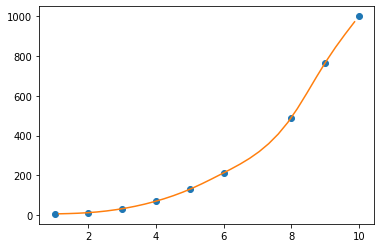

In [14]:
spline=[]
for h in range(len(ax)):
    ss=s(ax[h])
    spline.append(ss)
plt.plot(Ap,y,'o')

plt.plot(ax,spline,label='Interpolación spline cubica')

In [19]:
#evaluando en x=7
s(7)

312.69818773234203

# Comporación, Análisis de Resultados y conclusiones 


In [21]:
d = {'Metodo de regresion o interpolación': ['Ref. lineal', 'Reg. polinomica','Interpolacion de lagrange','Spline cubica'], 'evaluando en x=7': [481.7271, 341.8738,321.1762,312.6982]}
df = pd.DataFrame(data=d)
df

,Metodo de regresion o interpolación,evaluando en x=7
0,Ref. lineal,481.7271
1,Reg. polinomica,341.8738
2,Interpolacion de lagrange,321.1762
3,Spline cubica,312.6982


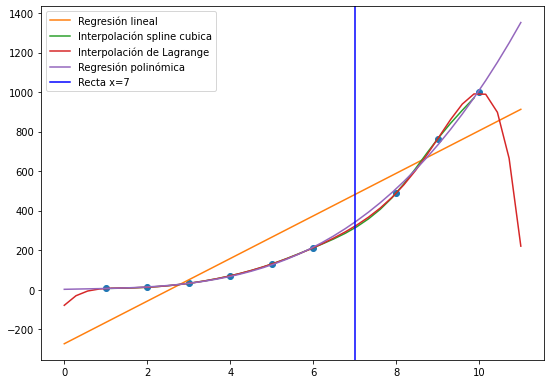

In [30]:
sol3=opt(A3,y)
a,b,c,d=sol3
plt.plot(Ap,y,'o')
plt.plot(ax,yli,label='Regresión lineal')
plt.plot(ax,spline,label='Interpolación spline cubica')
plt.plot(ax,P(ax),label='Interpolación de Lagrange')
plt.plot(ax,pol3(a,b,c,d,ax),label='Regresión polinómica')
plt.axvline(x = 7, color = 'b', label = 'Recta x=7')
plt.rcParams["figure.figsize"] = (10,7.5)
plt.legend()
plt.grid
plt.show()

- Es apreciable que los métodos de interpolación se ajustan mas a un comportamiento de la curva mientras que los de regresión lineal y regresión polinómica no

- Los métodos de regresión son muy útiles para predecir un comportamiento reduciendo el error de esta aproximación mientras que las interpolaciones al pasar por todos los datos al aproximar para una predicción se tendrá un mayor error o no dado que la única condición es que se pase por unos determinados puntos.

- los métodos de regresión de polinomios incluyendo la regresión lineal son muy fáciles de implementar ya que se requiere Solucionar un mismo sistema matricial que solo depende del orden del polinomio a ajustar en el tamaño de cada matriz. para mayor grado puede requerir mayor trabajo computacional

- Los métodos de interpolación requieren un numero mucho mayor de operaciones y ademas se depende de una forma especifica para interpolar entre puntos. 

# referencias
[1] Rodriguez karem, Leon Escobar. Notas de Clase Introducción Modelamiento Matemático. Univeridad Del Valle, 2022.

[2] Heath, M. T. (2018). Scientific computing: an introductory survey, revised second edition. Society for Industrial and Applied Mathematics.

[3] Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers (Vol. 1221). New York: Mcgraw-hill.
